STUDENT NAME: Raymond Shum

CLASS: CST383-30_SP22

ASSIGNMENT: Week 7 - Lab 4

DUE DATE: Feb. 22, 2022

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  7 16:10:24 2019

@author: Glenn
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/german-credit.csv")
bad_loan = df['good.loan'] - 1

# use only numeric data, and scale it
df = df[["duration.in.months", "amount", "percentage.of.disposable.income", "at.residence.since", 
              "age.in.years", "num.credits.at.bank"]]
X = df.apply(zscore).values
y = bad_loan.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# see how knn classifier works as training size changes


k = 3
knn = KNeighborsClassifier(n_neighbors=k)
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  # train model on a subset of the training data
  knn.fit(X_train1, y_train1)

  # error on subset of training data
  tr_predicted = knn.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  # error on all test data
  te_predicted = knn.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

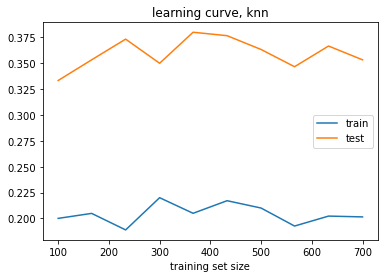

In [6]:
#
# plot the learning curve here
#

plt.plot(tr_sizes, tr_errs, label="train")
plt.plot(tr_sizes, te_errs, label="test")
plt.xlabel('training set size')
plt.title('learning curve, knn')
plt.legend()

In [36]:
def training(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    te_errs = []
    tr_errs = []
    tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
    for tr_size in tr_sizes:
        X_train1 = X_train[:tr_size,:]
        y_train1 = y_train[:tr_size]

        # train model on a subset of the training data
        knn.fit(X_train1, y_train1)

        # error on subset of training data
        tr_predicted = knn.predict(X_train1)
        err = (tr_predicted != y_train1).mean()
        tr_errs.append(err)

        # error on all test data
        te_predicted = knn.predict(X_test)
        err = (te_predicted != y_test).mean()
        te_errs.append(err)    
    plt.plot(tr_sizes, tr_errs, label="train")
    plt.plot(tr_sizes, te_errs, label="test")
    plt.xlabel('training set size')
    plt.title(f'learning curve, knn, neighbors={k}')
    plt.legend()

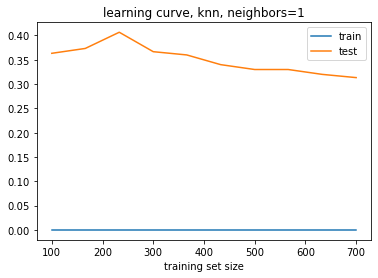

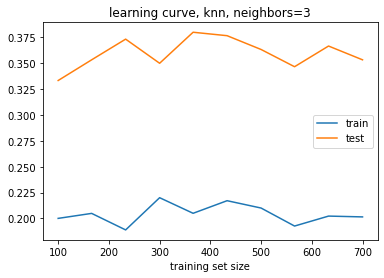

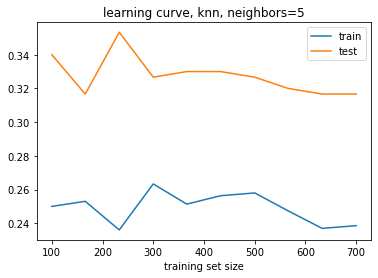

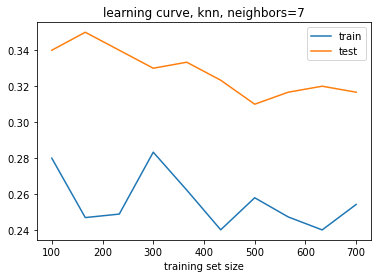

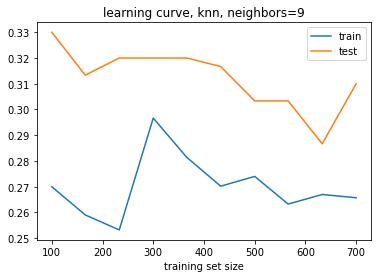

In [43]:
for i in range(1,10,2):
    plt.figure()
    training(i)

In [ ]:
# It looks like k = 1 is overfitting (memorizing the training data) with error = 0
# It looks like the lowest test error occurs at neighbors=9 and training set size
# at around 630